## The Conservative Duffing Oscillator

The system is given by the Hamiltonian:

$$
H(q, p) = \frac{p^2}{2} - \frac{q^2}{2} + \frac{q^4}{4},
$$

where $q$ and $p$ are canonically conjugate variables representing the coordinate and momentum, respectively. The corresponding equations of motion:

\begin{align*}
\dot{q} &= \frac{\partial H}{\partial p} = p, \\
\dot{p} &= -\frac{\partial H}{\partial q} = q - q^3.
\end{align*}

In [1]:
from duffing import ConservativeDuffingSystem
from models import BaselineNN, HamiltonianNN
from visualizer import (
    setup_plot_style,
    plot_trajectory_and_phase_trajectory,
    plot_phase_portraits,
    plot_hamiltonian_time_evolution,
    plot_hamiltonian_surfaces_comparison,
    plot_phase_trajectories
)
import torch
import numpy as np

setup_plot_style()

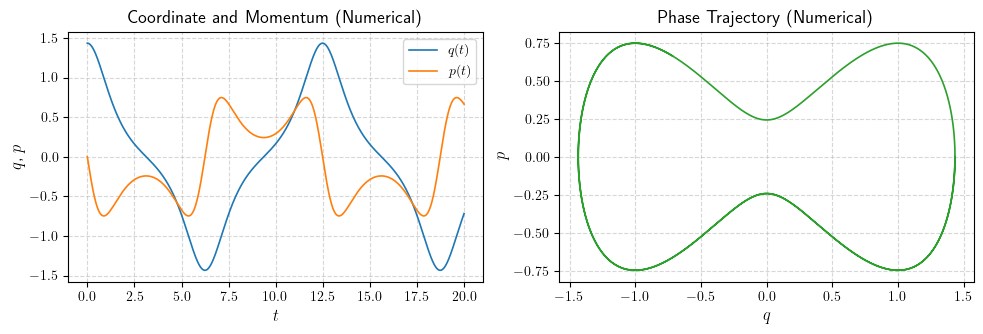

In [2]:
system = ConservativeDuffingSystem()
t_eval = system.t_eval
q0, p0 = np.sqrt(2) + 0.02, 0.0
x0 = (q0, p0)

trajectory_num = system.simulate_trajectory_numerical(x0)
plot_trajectory_and_phase_trajectory(t_eval, trajectory_num)

In [3]:
train_loader, test_loader = system.generate_dataset()

X_train: (80000, 2), y_train: (80000, 2)
X_test:  (20000, 2), y_test:  (20000, 2)


Training BaselineNN:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 01: train_loss = 0.899297, test_loss = 0.731238
Epoch 02: train_loss = 0.500573, test_loss = 0.203984
Epoch 03: train_loss = 0.062882, test_loss = 0.014238
Epoch 04: train_loss = 0.008493, test_loss = 0.005804
Epoch 05: train_loss = 0.004208, test_loss = 0.003426
Epoch 06: train_loss = 0.002675, test_loss = 0.002409
Epoch 07: train_loss = 0.001872, test_loss = 0.001619
Epoch 08: train_loss = 0.001304, test_loss = 0.001151
Epoch 09: train_loss = 0.000932, test_loss = 0.000860
Epoch 10: train_loss = 0.000695, test_loss = 0.000638


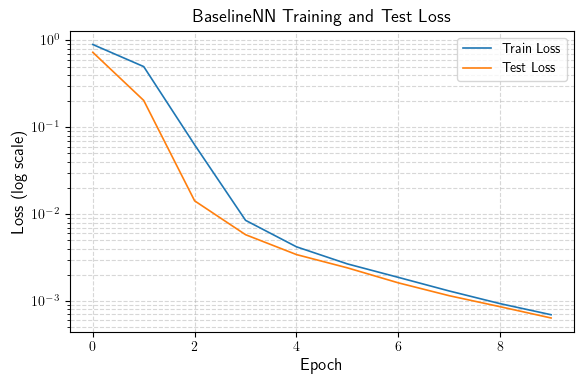

Training HamiltonianNN:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 01: train_loss = 1.154648, test_loss = 0.375267
Epoch 02: train_loss = 0.135512, test_loss = 0.031224
Epoch 03: train_loss = 0.016698, test_loss = 0.008237
Epoch 04: train_loss = 0.003852, test_loss = 0.002326
Epoch 05: train_loss = 0.001666, test_loss = 0.001312
Epoch 06: train_loss = 0.001030, test_loss = 0.000910
Epoch 07: train_loss = 0.000727, test_loss = 0.000676
Epoch 08: train_loss = 0.000538, test_loss = 0.000499
Epoch 09: train_loss = 0.000408, test_loss = 0.000427
Epoch 10: train_loss = 0.000347, test_loss = 0.000317


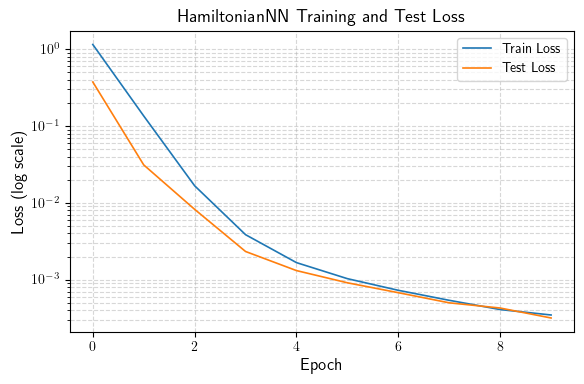

In [4]:
bnn = BaselineNN()
optimizer = torch.optim.Adam(bnn.parameters(), lr=1e-3)
bnn.train_model(train_loader, test_loader, optimizer)
bnn.plot_loss()

hnn = HamiltonianNN()
optimizer = torch.optim.Adam(hnn.parameters(), lr=1e-3)
hnn.train_model(train_loader, test_loader, optimizer)
hnn.plot_loss()

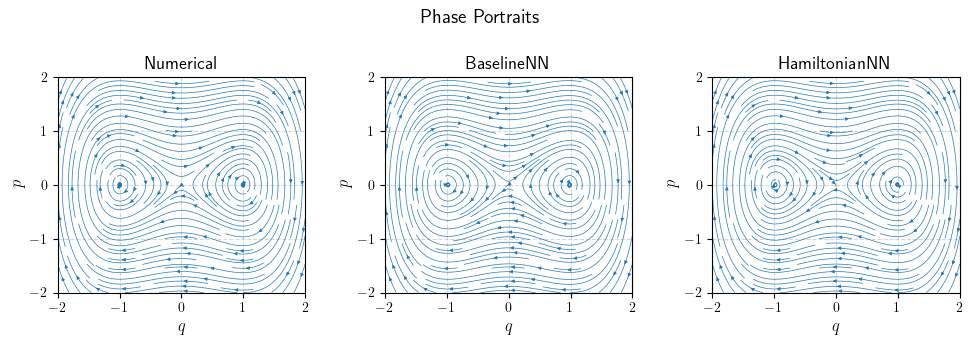

In [5]:
plot_phase_portraits(system, bnn, hnn)

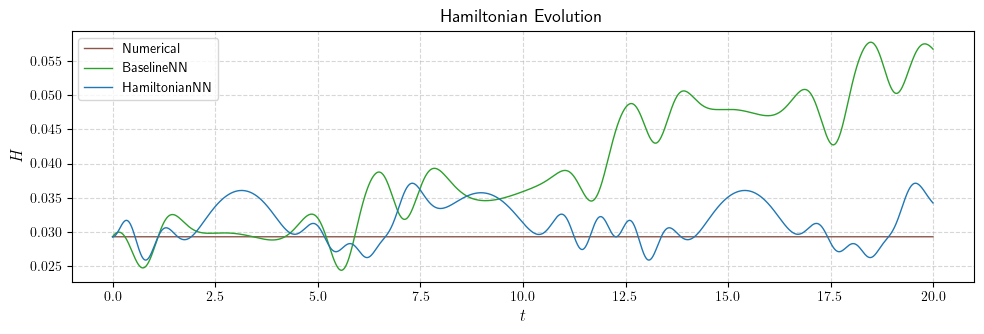

In [6]:
trajectory_bnn = system.simulate_trajectory_by_model(bnn, x0)
trajectory_hnn = system.simulate_trajectory_by_model(hnn, x0)

H_num = system.get_hamiltonian(trajectory_num)
H_bnn = system.get_hamiltonian(trajectory_bnn)
H_hnn = system.get_hamiltonian(trajectory_hnn)

plot_hamiltonian_time_evolution(t_eval, H_num, H_bnn, H_hnn)

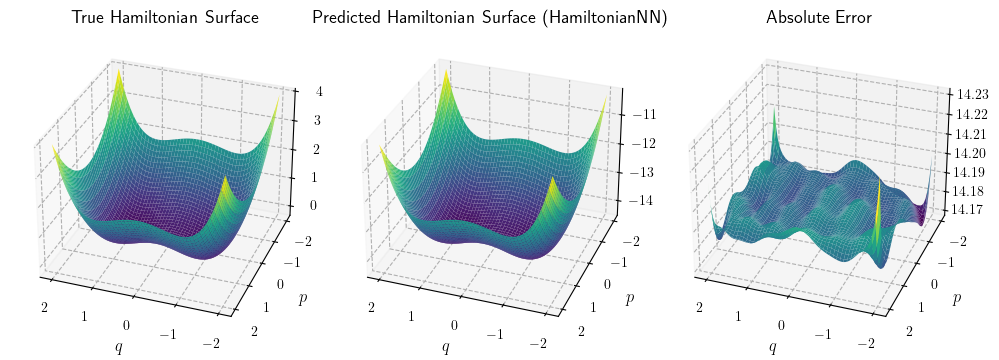

In [7]:
plot_hamiltonian_surfaces_comparison(system, hnn)

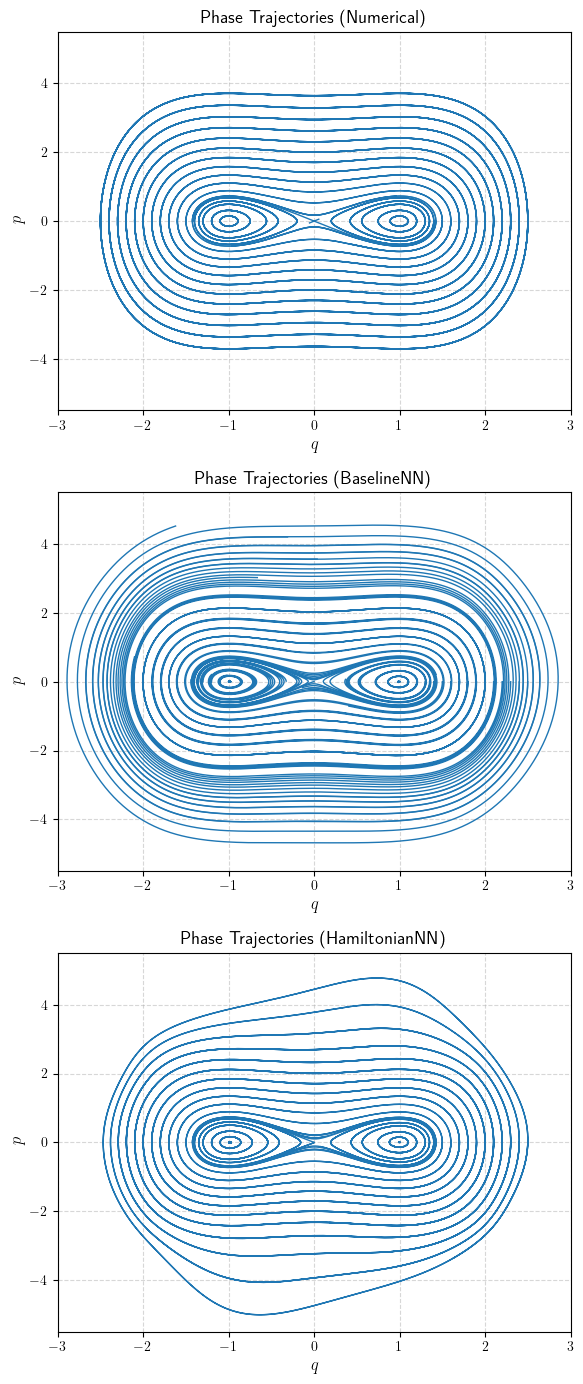

In [8]:
# q0 = 0 -> max, +-1 -> min, +-sqrt(2) -> separatrices

q0_values = (
   [-np.sqrt(2) - 0.01, -np.sqrt(2)] +
   [-1.4, -1.35, -1.3, -1.2, -1.1, -1.0] +
   [0] +
   [1.0, 1.1, 1.2, 1.3, 1.35, 1.4] +
   [np.sqrt(2), np.sqrt(2) + 0.01] +
   [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
)

x0_values = [(q0, p0) for q0 in q0_values]

plot_phase_trajectories(system, bnn, hnn, x0_values)

In [9]:
# TODO: Kotkin, Serbo: 6.4, 8.8, 10.21; limit cycle; Lorenz attractor